<a href="https://colab.research.google.com/github/uday-PSC/ETL-Ecommerce-Pipeline/blob/main/notebooks/ETL_Ecommerce_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score


In [ ]:
os.makedirs('data', exist_ok=True)
os.makedirs('outputs', exist_ok=True)


In [ ]:
start_time = time.time()


In [ ]:
np.random.seed(42)

n = 1000  # number of transactions

data = {
    'InvoiceNo': np.random.randint(100000, 200000, n),
    'CustomerID': np.random.randint(1000, 1100, n),
    'InvoiceDate': pd.date_range(start='2024-01-01', periods=n, freq='H'),
    'Quantity': np.random.randint(1, 10, n),
    'UnitPrice': np.round(np.random.uniform(5, 100, n), 2),
    'Country': np.random.choice(['India', 'USA', 'UK', 'Germany'], n)
}

df = pd.DataFrame(data)
print(df.head())


   InvoiceNo  CustomerID         InvoiceDate  Quantity  UnitPrice  Country
0     115795        1063 2024-01-01 00:00:00         1      38.99    India
1     100860        1097 2024-01-01 01:00:00         8      51.95      USA
2     176820        1058 2024-01-01 02:00:00         2      83.68  Germany
3     154886        1055 2024-01-01 03:00:00         1      36.84       UK
4     106265        1058 2024-01-01 04:00:00         2      21.51    India


/tmp/ipython-input-4270119623.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'InvoiceDate': pd.date_range(start='2024-01-01', periods=n, freq='H'),


In [ ]:
# Introduce missing CustomerID values
df.loc[df.sample(frac=0.02).index, 'CustomerID'] = np.nan

# Remove missing values
df.dropna(subset=['CustomerID'], inplace=True)


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [ ]:
df.to_csv('data/cleaned_ecommerce_data.csv', index=False)


In [ ]:
latest_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
1000.0            3          9   3074.44
1001.0            1         10   2609.18
1002.0            2         10   2007.93
1003.0            5          8   1328.22
1004.0            8         13   4113.59


In [ ]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].astype(int).sum(axis=1)


In [ ]:
def segment(score):
    if score >= 10:
        return 'High Value'
    elif score >= 6:
        return 'Medium Value'
    else:
        return 'Low Value'

rfm['Segment'] = rfm['RFM_Score'].apply(segment)


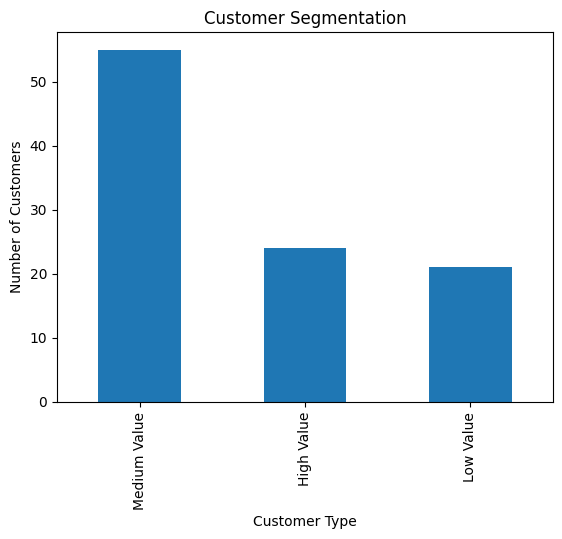

In [ ]:
# Count customers in each segment
segment_counts = rfm['Segment'].value_counts()

# Create bar chart
plt.figure()
segment_counts.plot(kind='bar')

# Add labels
plt.title('Customer Segmentation')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')

# Show plot
plt.show()


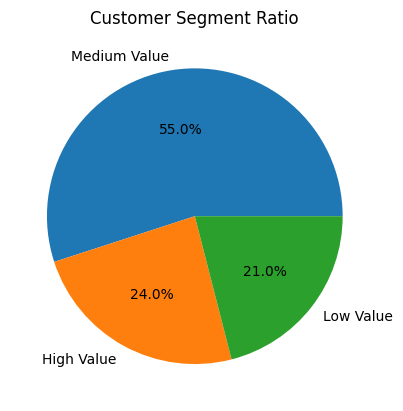

In [ ]:
plt.figure()
segment_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Customer Segment Ratio')
plt.ylabel('')  # removes unwanted label

plt.show()


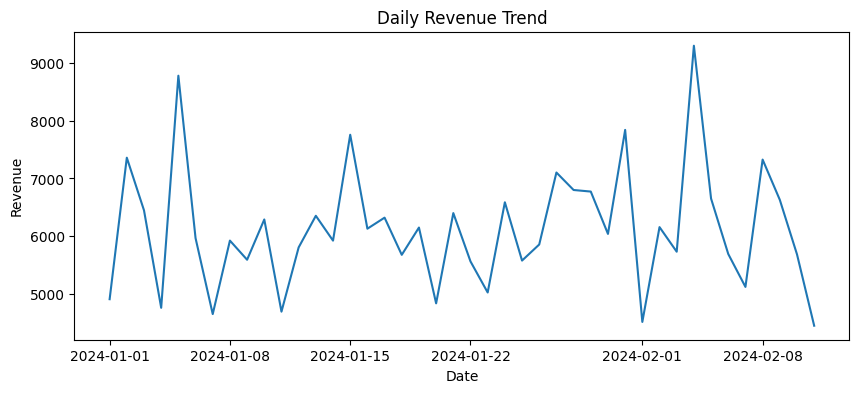

In [ ]:
daily_revenue = df.groupby(df['InvoiceDate'].dt.date)['TotalAmount'].sum()

plt.figure(figsize=(10,4))
plt.plot(daily_revenue)

plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.show()


In [ ]:
rfm['Actual'] = (rfm['RFM_Score'] >= 8).astype(int)
rfm['Predicted'] = (rfm['Monetary'] > rfm['Monetary'].mean()).astype(int)

accuracy = accuracy_score(rfm['Actual'], rfm['Predicted'])
precision = precision_score(rfm['Actual'], rfm['Predicted'])
recall = recall_score(rfm['Actual'], rfm['Predicted'])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.84
Precision: 0.8666666666666667
Recall: 0.7959183673469388


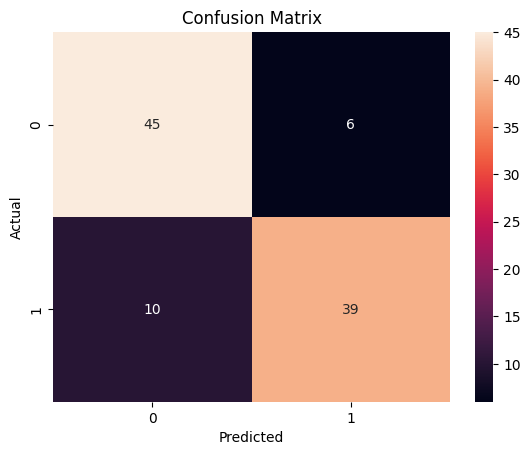

In [ ]:
cm = confusion_matrix(rfm['Actual'], rfm['Predicted'])

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()


In [ ]:
rfm.to_csv('outputs/rfm_final_output.csv', index=False)


In [ ]:
end_time = time.time()
print("Total ETL Execution Time:", end_time - start_time, "seconds")


Total ETL Execution Time: 1614.9640181064606 seconds


In [ ]:
from google.colab import files

files.download('cleaned_ecommerce_data.csv')
files.download('processed_rfm_data.csv')
files.download('rfm_final_output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>